# 1. install and import necessary libraries

In [ ]:
# !pip install face-recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import shutil
import face_recognition as fc
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import sklearn.metrics as smt
import seaborn as sns

# 2. organize the dataset

In [177]:
df = pd.read_csv('faces.csv')
df.head()

(2562, 2)

In [175]:
df.label.value_counts().to_frame()

,count
label,
Brad Pitt,120
Vijay Deverakonda,115
Robert Downey Jr,113
Hugh Jackman,112
Jessica Alba,108
Henry Cavill,106
Natalie Portman,105
Priyanka Chopra,102
Hrithik Roshan,101


# 3. encode the faces

#### this function takes path of dir containing dirs (each one is class) and start to encode every face in every image to smaller array and its label then return the two array of faces and labels

In [15]:
def encode_images(df):
    dir = r'C:\Users\Abdelrahman\Instant AI\DL projects\facerecognition\Original Images'
    face_encodings_list = []
    labels_list = []
    for path, label in df.values:
        img_path = os.path.join(dir, label, path)
        image = fc.load_image_file(img_path)
        face_encodings = fc.face_encodings(image)

        if face_encodings:
            face_encoding = face_encodings[0]
            face_encodings_list.append(face_encoding)
            labels_list.append(label)
    return face_encodings_list, labels_list

In [20]:
x, y = encode_images(df)

In [171]:
df2 = pd.read_csv('Face Encoding.csv')
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.058074,0.068106,0.113864,-0.020131,-0.037599,-0.079900,-0.098310,-0.086292,0.081782,-0.130496,...,0.125976,0.008028,-0.060382,0.021014,-0.179682,-0.065805,0.005155,-0.077930,0.070713,-0.000774
1,-0.116736,0.161444,0.110005,-0.162901,-0.128266,-0.028711,-0.054513,-0.075093,0.245024,-0.122001,...,-0.004424,0.020396,0.122542,-0.060849,-0.183645,-0.119854,0.006590,-0.108301,-0.078526,0.080515
2,-0.081622,0.106591,0.118305,-0.066275,-0.174922,0.037001,0.045027,-0.185093,0.174487,-0.185466,...,0.068113,0.099600,0.052061,0.014598,-0.139734,-0.127780,0.120190,-0.017357,-0.024475,0.102324
3,-0.160288,0.029510,0.044050,-0.002492,-0.156954,0.066301,-0.040885,-0.015570,0.063300,-0.064568,...,0.073940,0.057519,0.056600,0.023504,-0.259126,-0.106932,0.055270,-0.166035,-0.000546,0.108477
4,-0.201423,0.025428,0.117119,-0.023745,-0.065701,-0.062489,-0.056426,0.042814,0.094122,-0.067834,...,0.047211,-0.009688,-0.020449,-0.051397,-0.131054,-0.116417,0.021968,-0.057498,0.063530,0.042684


In [172]:
df2.shape

(2544, 128)

## 4. splitting the data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, stratify=y, random_state=42
)

# 5. classification model

In [23]:
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree', weights='distance')

In [24]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')

# 6. evaluating model

In [25]:
knn_clf.score(x_train, y_train)

1.0

In [176]:
y_df = knn_clf.predict(df2)
knn_clf.score(df2, df['label'])

C:\Users\Abdelrahman\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Abdelrahman\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [2562, 2544]

## 6.1 important scores

In [26]:
y_pred = knn_clf.predict(x_test)
precision = smt.precision_score(y_test, y_pred, average='weighted')
recall = smt.recall_score(y_test, y_pred, average='weighted')
f1 = smt.f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## 6.2 confusion matrix

<Axes: >

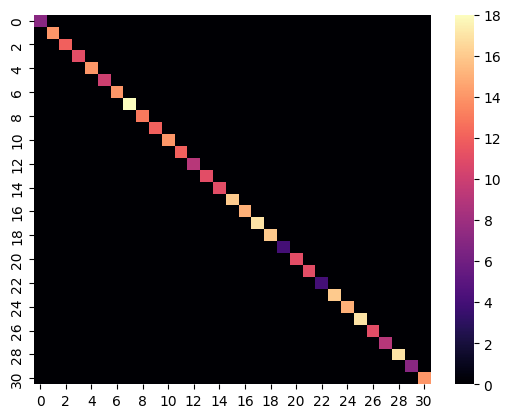

In [27]:
conf_matrix = smt.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,cmap='magma')

# 7. predicting some images

In [28]:
def show_image(image, x=10, y=8, bgr=False):
    plt.figure(figsize=(x, y))

    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    elif len(image.shape) == 3:
        if bgr:
            image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        plt.imshow(image)

    plt.xticks([])
    plt.yticks([])
    plt.show()


In [143]:
def predict_and_visualize(image_path):
    # Read the image
    image = cv.imread(image_path)
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_height, image_width = image.shape[:2]

    # Predict
    face_locations = fc.face_locations(rgb_image)
    face_encodings = fc.face_encodings(rgb_image, face_locations)

    # Visualize
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):

        matches = knn_clf.kneighbors([face_encoding], n_neighbors=1)
        name = knn_clf.predict([face_encoding])[0] if matches[0][0][0] < 0.5 else "Unknown"
        
        cv.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        font_scale = image_width / 700.0  
        text_position = (left, bottom + int(image_height * 0.06)) 
        cv.putText(image, name, text_position, cv.FONT_HERSHEY_DUPLEX, font_scale, (0, 255, 0), 2)

    show_image(image, bgr=True)


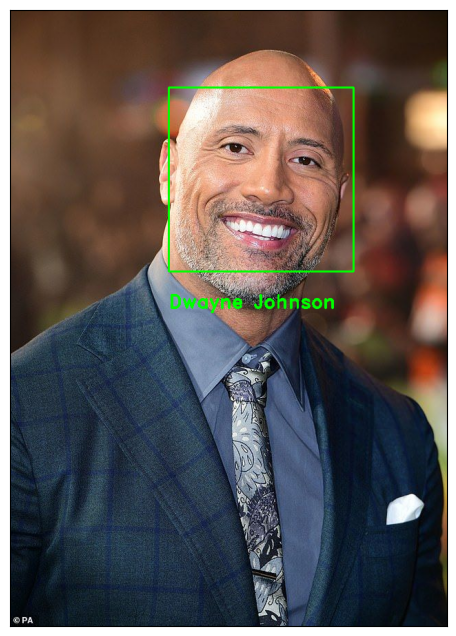

In [148]:
img = 'the rock.jpeg'
predict_and_visualize(img)

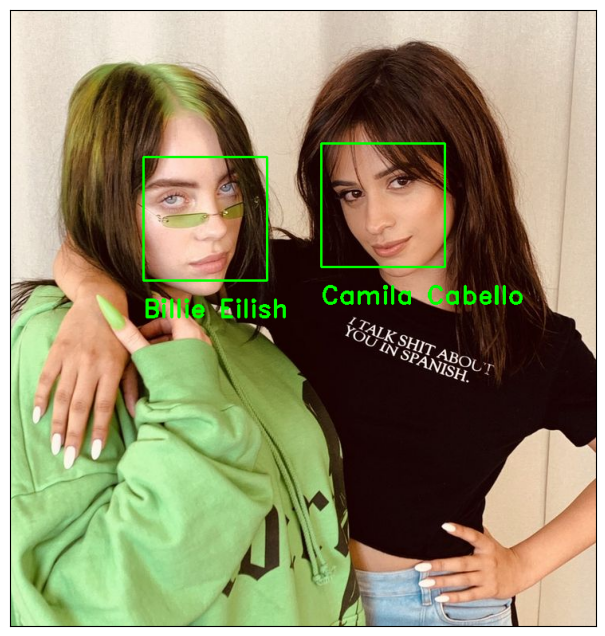

In [146]:
img = 'Billie and camila.jpeg'
predict_and_visualize(img)

#### the model prints Unkown to any face that is not in the dataset

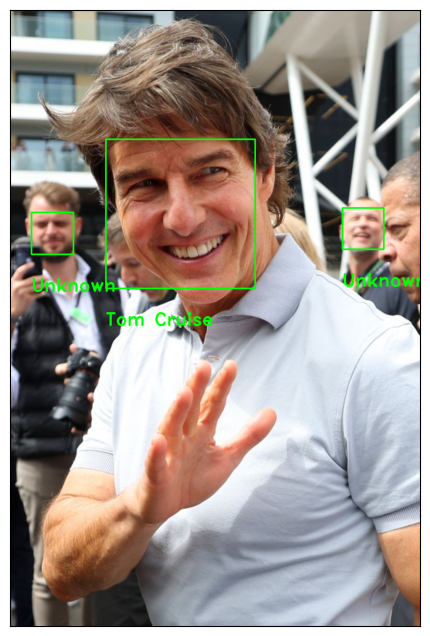

In [145]:
img = 'Tom Cruise.jpeg'
predict_and_visualize(img)

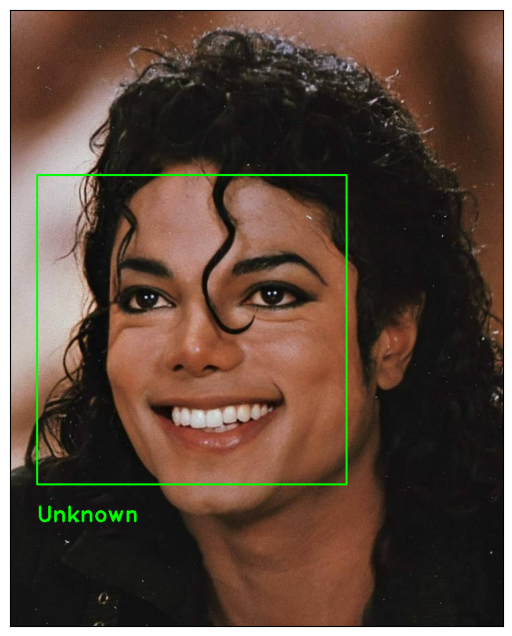

In [149]:
img = 'Michael jackson.jpeg'
predict_and_visualize(img)

#### Tom Cruise is in the dataset but Michael Jackson is not